In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL datasets\cardio_train.csv")

In [11]:
df.head()

,id,age_days,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
print(df.isnull().sum())

id             0
age_days       0
age_years      0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler

In [27]:
numerical_cols = ['age_years','height','weight','ap_hi','ap_lo','cholesterol','gluc']

In [29]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [31]:
df = pd.get_dummies(df, columns = ['gender','cholesterol','gluc'], drop_first = True)

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(['cardio'],axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [57]:
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n",classification_report(y_test, y_pred_logreg))

Logistic Regression Results
Accuracy: 0.7139285714285715
Confusion Matrix:
 [[5278 1726]
 [2279 4717]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [67]:
y_pred_tree = tree.predict(X_test)

In [69]:
print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n",classification_report(y_test, y_pred_tree))


Decision Tree Results
Accuracy: 0.7245714285714285
Confusion Matrix:
 [[5098 1906]
 [1950 5046]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      7004
           1       0.73      0.72      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



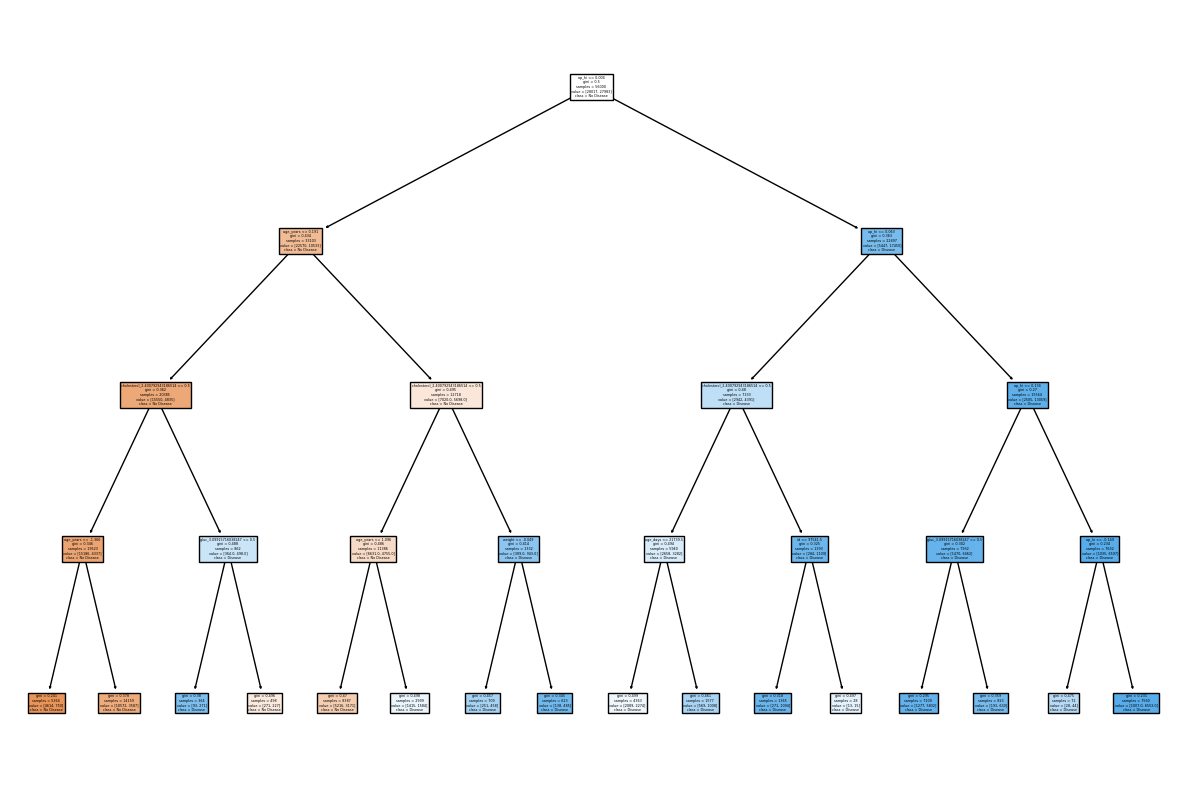

In [87]:
plt.figure(figsize = (15,10))
plot_tree(tree, feature_names =X.columns, class_names = ['No Disease', "Disease"], filled = True)
plt.show()

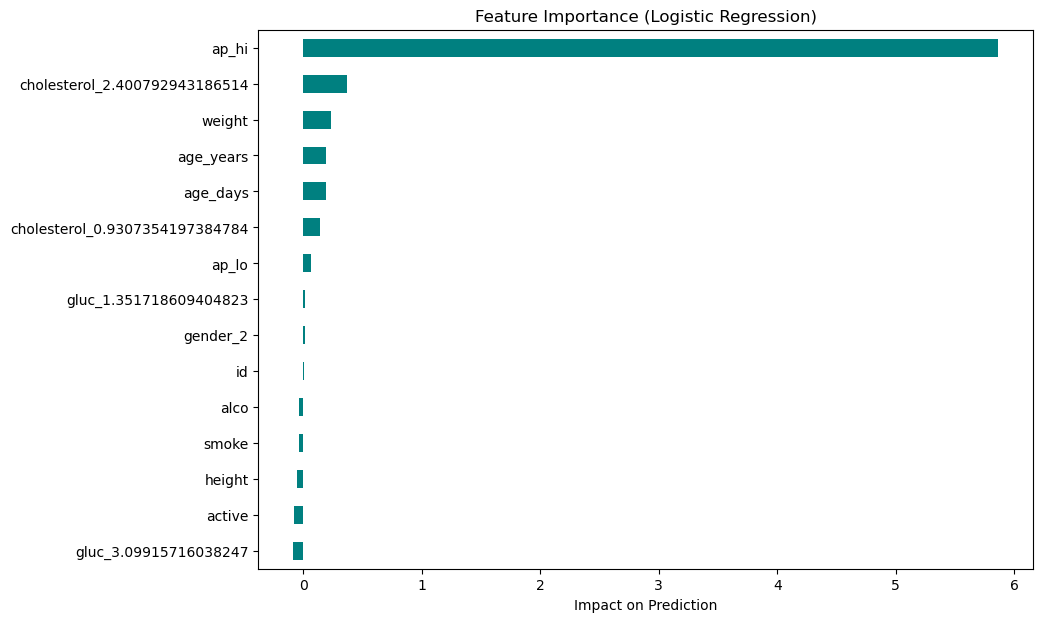

In [89]:
feature_importance = pd.Series(logreg.coef_[0], index= X.columns)
feature_importance.sort_values().plot(kind = 'barh', figsize = (10,7), color ='teal')
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Impact on Prediction")
plt.show()

In [91]:
tree_importance = pd.Series(tree.feature_importances_, index = X.columns)

Text(0.5, 0, 'Importance')

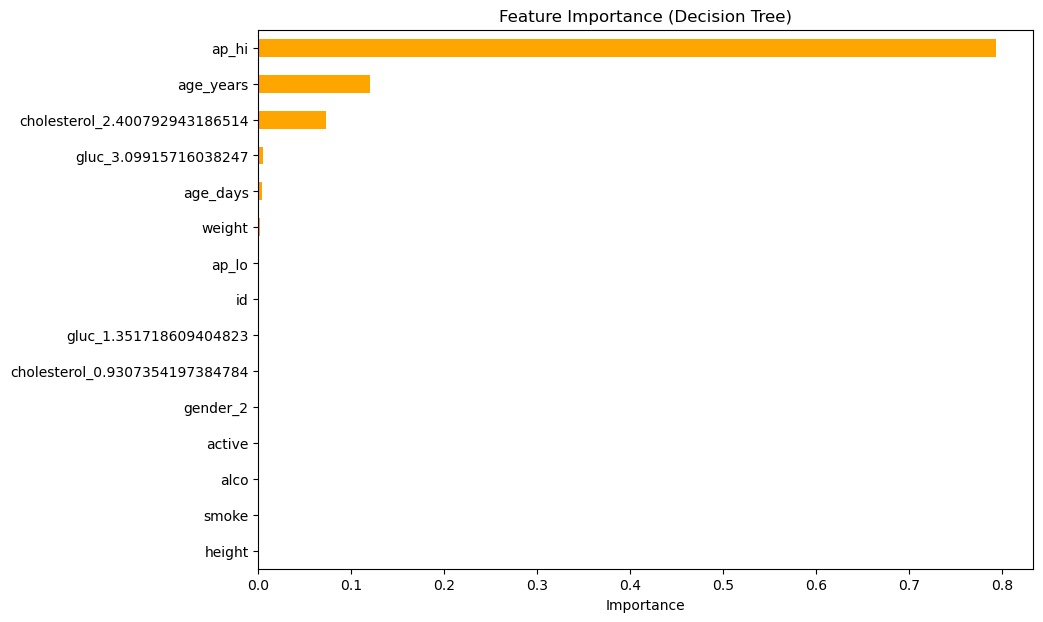

In [93]:
tree_importance.sort_values().plot(kind = 'barh', figsize = (10,7), color = 'orange')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")

In [99]:
pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
    --------------------------------------- 10.2/545.3 kB ? eta -:--:--
    --------------------------------------- 10.2/545.3 kB ? eta -:--:--
    --------------------------------------- 10.2/545.3 kB ? eta -:--:--
   -- ------------------------------------ 30.7/545.3 kB 187.9 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/545.3 kB 187.9 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/545.3 kB 187.9 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/545.3 kB 187.9 kB/s eta 0:00:03
   ---- ------------------------------

In [100]:
import shap 

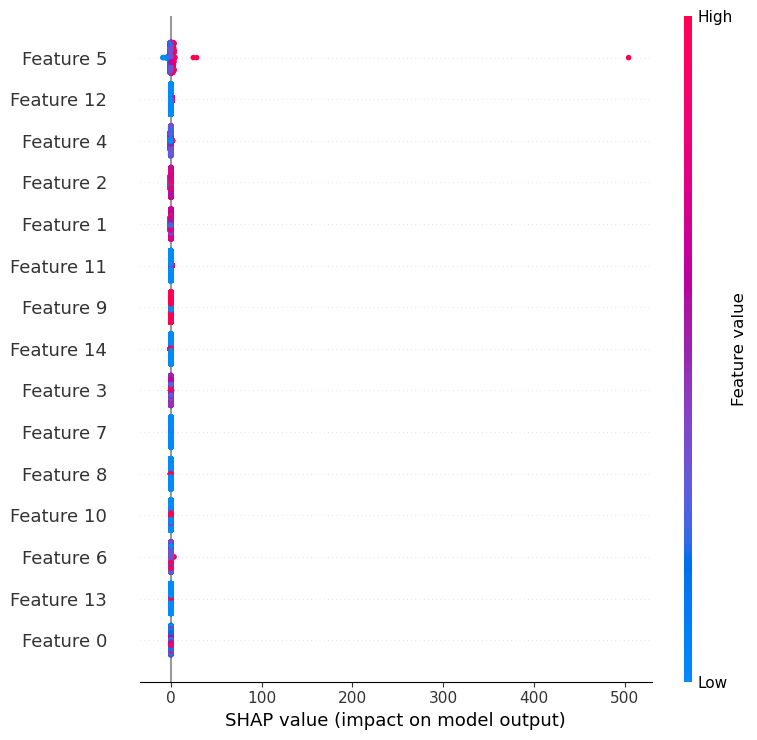

In [101]:
explainer = shap.Explainer(logreg, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test)

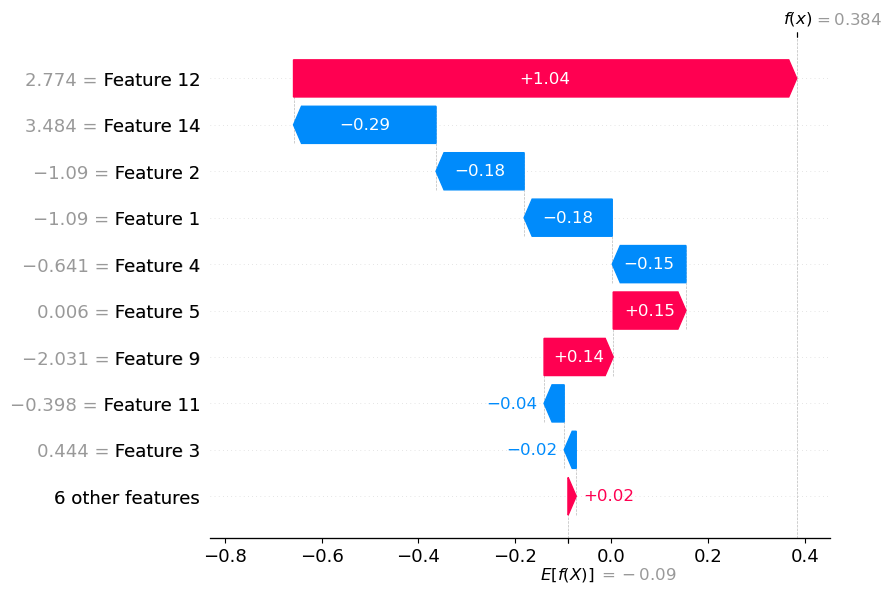

In [105]:
index = 5 
shap.plots.waterfall(shap_values[index])